In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt

from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
# graph function
def graph():
    plt.figure(figsize = (12,4))
    
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], 'b-', label = 'loss')
    plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['binary_accuracy'], 'g-', label = 'acc')
    plt.plot(history.history['val_binary_accuracy'], 'k--', label = 'val_acc')
    plt.xlabel('Epoch')
    plt.ylim([0.7, 1])
    plt.legend()

    return plt.show()

Loading the IMDB dataset

In [3]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000) 
#num_words = top 10,000 most frequently occurring words in training data

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 0으로 구성된 깡통 만들기 (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # 맞는 단어가 있는 경우 1로 표시하기
    return results

# Our vectorized training & test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 1. Baseline
- Hidden layer : 2
- Optimizer : rmsprop
- Loss : binary_crossentropy
- Metrics : accuracy
- Activation : relu
- Learning rate : 0.001
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > Loss: 0.2957 / Accuracy: 0.8818

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop', # RMSprop - 기울기 단순 누적X, 지수 가중 이동 평균을 사용하여 최신 기울기들이 더 크게 반영되도록
loss='binary_crossentropy',
metrics=['accuracy'])

In [7]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
checkpoint_path = './check.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_binary_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5042 - binary_accuracy: 0.7961 - val_loss: 0.3755 - val_binary_accuracy: 0.8741

Epoch 00001: val_binary_accuracy improved from -inf to 0.87410, saving model to ./check.h5
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2997 - binary_accuracy: 0.9057 - val_loss: 0.3041 - val_binary_accuracy: 0.8855

Epoch 00002: val_binary_accuracy improved from 0.87410 to 0.88550, saving model to ./check.h5
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2206 - binary_accuracy: 0.9267 - val_loss: 0.3190 - val_binary_accuracy: 0.8689

Epoch 00003: val_binary_accuracy did not improve from 0.88550
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1723 - binary_accuracy: 0.9442 - val_loss: 0.2741 - val_binary_accuracy: 0.8908

Epoch 00004: val_binary_accuracy improved from 0.88550 to 0.89080, saving model to ./check.h5
Epoch 5/20
30/30 [=================

782/782 [==============================] - 2s 3ms/step - loss: 0.2957 - binary_accuracy: 0.8818


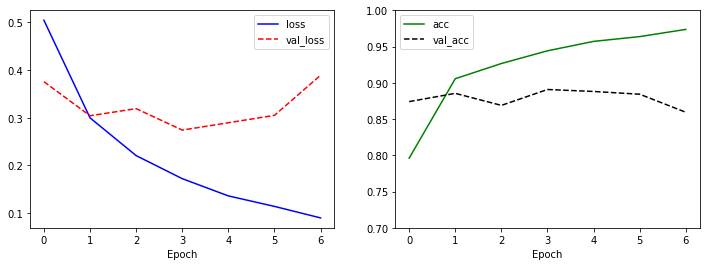

In [10]:
model.load_weights(checkpoint_path)
results = model.evaluate(x_test, y_test)

graph()

## 2. Add hidden layer
- Hidden layer : ***5 + Change hidden units***
- Optimizer : rmsprop
- Loss : binary_crossentropy
- Metrics : accuracy
- Activation : relu
- Learning rate : 0.001
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > Loss: 0.4880 / Accuracy: 0.8668

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', # RMSprop - 기울기 단순 누적X, 지수 가중 이동 평균을 사용하여 최신 기울기들이 더 크게 반영되도록
loss='binary_crossentropy',
metrics=['accuracy'])

In [12]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
checkpoint_path = './check.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_binary_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5898 - binary_accuracy: 0.7169 - val_loss: 0.5188 - val_binary_accuracy: 0.7894

Epoch 00001: val_binary_accuracy improved from -inf to 0.78940, saving model to ./check.h5
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4649 - binary_accuracy: 0.8816 - val_loss: 0.4764 - val_binary_accuracy: 0.8766

Epoch 00002: val_binary_accuracy improved from 0.78940 to 0.87660, saving model to ./check.h5
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4184 - binary_accuracy: 0.9195 - val_loss: 0.5003 - val_binary_accuracy: 0.8717

Epoch 00003: val_binary_accuracy did not improve from 0.87660
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3861 - binary_accuracy: 0.9414 - val_loss: 0.5761 - val_binary_accuracy: 0.8554

Epoch 00004: val_binary_accuracy did not improve from 0.87660
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - 

782/782 [==============================] - 3s 3ms/step - loss: 0.4880 - binary_accuracy: 0.8668


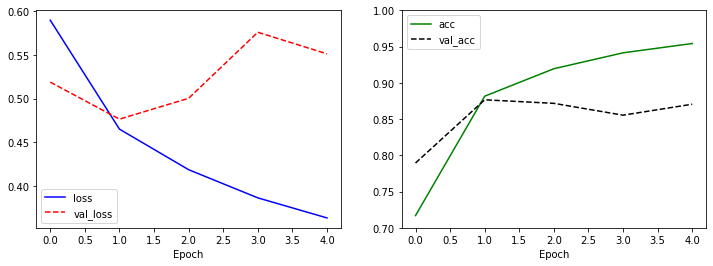

In [14]:
model.load_weights(checkpoint_path)
results = model.evaluate(x_test, y_test)

graph()

## 3. Reduce hidden layer
- Hidden layer : ***1***
- Optimizer : rmsprop
- Loss : binary_crossentropy
- Metrics : accuracy
- Activation : relu
- Learning rate : 0.001
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > Loss: 0.2924/ Accuracy: 0.8851

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', # RMSprop - 기울기 단순 누적X, 지수 가중 이동 평균을 사용하여 최신 기울기들이 더 크게 반영되도록
loss='binary_crossentropy',
metrics=['accuracy'])

In [16]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
checkpoint_path = './check.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_binary_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
30/30 [==============================] - 2s 33ms/step - loss: 0.5070 - binary_accuracy: 0.7945 - val_loss: 0.3881 - val_binary_accuracy: 0.8692

Epoch 00001: val_binary_accuracy improved from -inf to 0.86920, saving model to ./check.h5
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3199 - binary_accuracy: 0.9016 - val_loss: 0.3185 - val_binary_accuracy: 0.8873

Epoch 00002: val_binary_accuracy improved from 0.86920 to 0.88730, saving model to ./check.h5
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2475 - binary_accuracy: 0.9219 - val_loss: 0.2918 - val_binary_accuracy: 0.8898

Epoch 00003: val_binary_accuracy improved from 0.88730 to 0.88980, saving model to ./check.h5
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2033 - binary_accuracy: 0.9385 - val_loss: 0.2764 - val_binary_accuracy: 0.8912

Epoch 00004: val_binary_accuracy improved from 0.88980 to 0.89120, saving model to ./check.h5
Epo

782/782 [==============================] - 3s 3ms/step - loss: 0.2924 - binary_accuracy: 0.8851


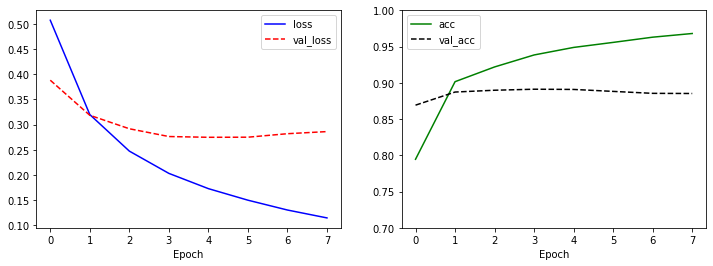

In [18]:
model.load_weights(checkpoint_path)
results = model.evaluate(x_test, y_test)

graph()

## 4. Change loss function
- Hidden layer : 2
- Optimizer : rmsprop
- Loss : ***MSE***
- Metrics : accuracy
- Activation : relu
- Learning rate : 0.001
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > Loss: 0.1015 / Accuracy: 0.8828

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop', # RMSprop - 기울기 단순 누적X, 지수 가중 이동 평균을 사용하여 최신 기울기들이 더 크게 반영되도록
loss='mse',
metrics=['accuracy'])

In [20]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='mse',
metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.mse,
metrics=[metrics.binary_accuracy])

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
checkpoint_path = './check.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_binary_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.1783 - binary_accuracy: 0.7823 - val_loss: 0.1256 - val_binary_accuracy: 0.8720

Epoch 00001: val_binary_accuracy improved from -inf to 0.87200, saving model to ./check.h5
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0978 - binary_accuracy: 0.8994 - val_loss: 0.0960 - val_binary_accuracy: 0.8896

Epoch 00002: val_binary_accuracy improved from 0.87200 to 0.88960, saving model to ./check.h5
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0685 - binary_accuracy: 0.9291 - val_loss: 0.0906 - val_binary_accuracy: 0.8854

Epoch 00003: val_binary_accuracy did not improve from 0.88960
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0528 - binary_accuracy: 0.9463 - val_loss: 0.0858 - val_binary_accuracy: 0.8865

Epoch 00004: val_binary_accuracy did not improve from 0.88960
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - 

782/782 [==============================] - 2s 3ms/step - loss: 0.1015 - binary_accuracy: 0.8828


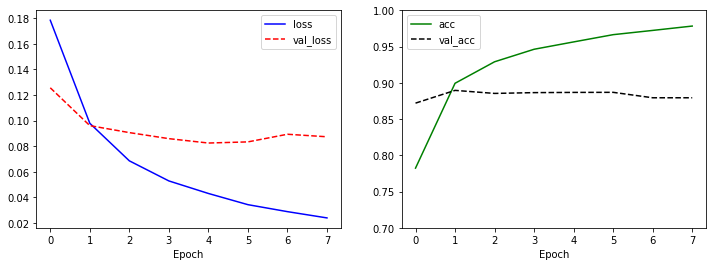

In [23]:
model.load_weights(checkpoint_path)
results = model.evaluate(x_test, y_test)

graph()

## 5. Change activation function
- Hidden layer : 2
- Optimizer : rmsprop
- Loss : binary_crossentropy
- Metrics : accuracy
- Activation : ***tanh***
- Learning rate : 0.001
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > Loss: 0.2938 / Accuracy: 0.8789

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop', # RMSprop - 기울기 단순 누적X, 지수 가중 이동 평균을 사용하여 최신 기울기들이 더 크게 반영되도록
loss='binary_crossentropy',
metrics=['accuracy'])

In [25]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [26]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
checkpoint_path = './check.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_binary_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.4987 - binary_accuracy: 0.7940 - val_loss: 0.3689 - val_binary_accuracy: 0.8704

Epoch 00001: val_binary_accuracy improved from -inf to 0.87040, saving model to ./check.h5
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2837 - binary_accuracy: 0.9074 - val_loss: 0.2901 - val_binary_accuracy: 0.8871

Epoch 00002: val_binary_accuracy improved from 0.87040 to 0.88710, saving model to ./check.h5
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1953 - binary_accuracy: 0.9359 - val_loss: 0.2753 - val_binary_accuracy: 0.8875

Epoch 00003: val_binary_accuracy improved from 0.88710 to 0.88750, saving model to ./check.h5
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1497 - binary_accuracy: 0.9501 - val_loss: 0.2790 - val_binary_accuracy: 0.8862

Epoch 00004: val_binary_accuracy did not improve from 0.88750
Epoch 5/20
30/30 [=================

782/782 [==============================] - 2s 3ms/step - loss: 0.2938 - binary_accuracy: 0.8789


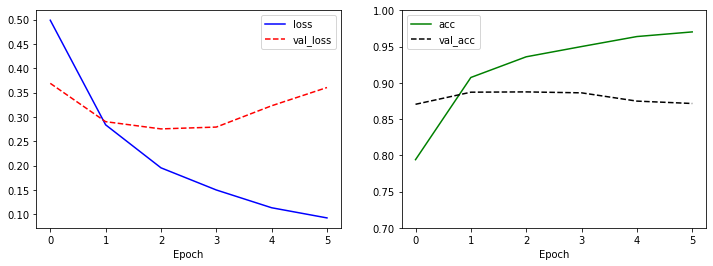

In [28]:
model.load_weights(checkpoint_path)
results = model.evaluate(x_test, y_test)

graph()

## 6. Change learning rate
- Hidden layer : 2
- Optimizer : rmsprop
- Loss : binary_crossentropy
- Metrics : accuracy
- Activation : relu
- Learning rate : ***0.00001***
- Epochs : 20
- Batch_size : 512
- Early stopping, check point

#### Result > Loss: 0.6315 / Accuracy: 0.7304

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop', # RMSprop - 기울기 단순 누적X, 지수 가중 이동 평균을 사용하여 최신 기울기들이 더 크게 반영되도록
loss='binary_crossentropy',
metrics=['accuracy'])

In [30]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.00001),
loss='binary_crossentropy',
metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.00001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [31]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [32]:
checkpoint_path = './check.h5'

cp = ModelCheckpoint(filepath=checkpoint_path,
                                save_weights_only=True,
                                save_best_only=True,
                                monitor='val_binary_accuracy',
                                verbose=1)

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val),
callbacks=[cp, es])

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6922 - binary_accuracy: 0.5154 - val_loss: 0.6921 - val_binary_accuracy: 0.5185

Epoch 00001: val_binary_accuracy improved from -inf to 0.51850, saving model to ./check.h5
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6899 - binary_accuracy: 0.5371 - val_loss: 0.6904 - val_binary_accuracy: 0.5324

Epoch 00002: val_binary_accuracy improved from 0.51850 to 0.53240, saving model to ./check.h5
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6879 - binary_accuracy: 0.5553 - val_loss: 0.6887 - val_binary_accuracy: 0.5448

Epoch 00003: val_binary_accuracy improved from 0.53240 to 0.54480, saving model to ./check.h5
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6856 - binary_accuracy: 0.5726 - val_loss: 0.6868 - val_binary_accuracy: 0.5605

Epoch 00004: val_binary_accuracy improved from 0.54480 to 0.56050, saving model to ./check.h5
Epo

782/782 [==============================] - 2s 3ms/step - loss: 0.6315 - binary_accuracy: 0.7304


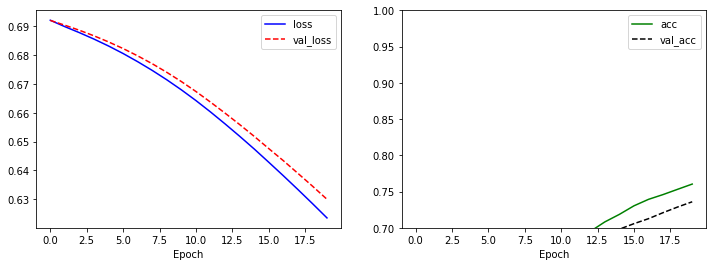

In [33]:
model.load_weights(checkpoint_path)
results = model.evaluate(x_test, y_test)

graph()